In [2]:
# testing notebook
# test for query processing time
# test for different results when different methods are used.

import sys
import os
import pickle
# use abs path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
# "C:\Users\annie\Downloads\data"
sys.path.append(parent_dir)

from retrieval_models.data_loaders import Index
from retrieval_models.retrieval_functions import *
from retrieval_models.reranking import Reranker
from retrieval_models.evaluation_metrics import *
#from preprocessing.tokenizer import Tokenizer
#from preprocessing import NormalTextBlock, LinkBlock, CodeBlock, Block
import tqdm 
import os
import time
from scipy.stats import kendalltau, spearmanr


In [3]:
#import all the examples for ranked retrieval
queries_examples = []
BASE_DIR = os.getcwd()
index_path = os.path.join(BASE_DIR, "data", "queries_examples.txt")
with open(index_path, 'r', encoding='utf-8', errors='replace') as file:
    queries_examples = [line.strip() for line in file if line.strip()]  # Remove empty lines

print(queries_examples[0]) #print the first one for example
print(len(queries_examples)) #print the number of queries


TypeError: 'NoneType' object is not subscriptable in Python
24


In [4]:
#import all boolean examples
queries_examples_boolean = []
BASE_DIR = os.getcwd()
index_path = os.path.join(BASE_DIR, "data", "boolean_queries_examples.txt")
with open(index_path, 'r', encoding='utf-8', errors='replace') as file:
    queries_examples_boolean = [line.strip() for line in file if line.strip()]  # Remove empty lines

print(queries_examples_boolean[0]) #print the first one for example
print(len(queries_examples_boolean)) #print the number of boolean queries

data AND science
7


In [5]:
#initialize the object index 
# ignore the errors is because of the preprocessing done at this stage and it ignores some terms
index = Index()

Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1127363:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	1449406:
Skipping invalid doc_info line: 	820167:
done loading index positions
done finding vocab
c:\Users\annie\ttds_assignment\retrieval_models\data\doc_metadata.txt
done loading doc lengths


In [ ]:
# precompute the embeddings -> no need to run this again 
#print(index.vocab[1:10])
#embeddingmodel = EmbeddingModel(vocab = index.vocab)

['httpservletrequestwrapper', 'httpservletrequestwrapp', "httpservletrequest'", 'httpservletrequest', 'httpservletrequ', 'httpservletreqest', 'httpservletresponsewrapper', 'httpservletresponsewrapp', "httpservletresponse'"]


c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

Precomputing embeddings...


Processing batches: 100%|██████████| 9995/9995 [5:05:03<00:00,  1.83s/it]   


✅ Embeddings successfully saved to retrieval_models/data/vocab_embeddings.pkl
🔍 File confirmed at retrieval_models/data/vocab_embeddings.pkl


In [6]:
#after precomputing the embeddings load them in
def load_and_get_embedding(word, save_path="data/embeddings.pkl"):
    "function that loads the embeddings and returns the embedding of the word"
    with open(save_path, "rb") as f:
        embeddings, word_to_index = pickle.load(f)
    
    return embeddings[word_to_index[word]] if word in word_to_index else None

# Example usage
embedding_vector = load_and_get_embedding("java")
if embedding_vector is not None:
    print(f"Embedding: {embedding_vector[:5]} of size {len(embedding_vector)}...")  # Print first 5 values for readability

Embedding: [-0.18265761  0.33220416  0.08295575 -0.00454214  0.13252828] of size 768...


In [12]:
# Iterate over queries and print results
def run_queries(queries_examples, index, embedding_model=None, expansion=False, k=10):
    """
    Runs retrieval for a list of queries and prints top results.
    Also prints the total execution time.
    """
    start_time = time.time()  # Start timer

    retrieved_docs = {}
    
    for query in tqdm.tqdm(queries_examples):
        print("Query:", query)
        top_results = retrieval_function(query, index,embedding_model, expansion, k)
        print("Top results:", top_results)
        print("\n")
        retrieved_docs[query]=top_results

    end_time = time.time()  # End timer
    total_time = end_time - start_time

    print(f"Total Execution Time: {total_time:.4f} seconds")
    print(f"Average Time per Query: {total_time / len(queries_examples):.4f} seconds")

    return total_time, retrieved_docs


In [13]:
#the basic top k results for each query
_,retrieved_docs = run_queries(queries_examples, index, k=10)

  0%|          | 0/24 [00:00<?, ?it/s]

Query: TypeError: 'NoneType' object is not subscriptable in Python
Starting ranked search


  4%|▍         | 1/24 [00:01<00:30,  1.33s/it]

Top results: ['1490039', '1308079', '631788', '1689012', '1449620', '1689145', '768941', '1115313', '1772491', '550585']


Query: NullPointerException handling in Java
Starting ranked search


  8%|▊         | 2/24 [00:02<00:32,  1.49s/it]

Top results: ['1345786', '1264818', '1733292', '1184789', '1366832', '767009', '1028892', '1607800', '1697522', '961538']


Query: ModuleNotFoundError: No module named 'requests'
Starting ranked search


 12%|█▎        | 3/24 [00:04<00:29,  1.42s/it]

Top results: ['818020', '816834', '1731441', '1477365']


Query: Segmentation fault in C++
Starting ranked search


 17%|█▋        | 4/24 [00:04<00:21,  1.09s/it]

Top results: ['818020', '816834', '1731441', '1477365', '1790201', '742549', '1251464', '960382', '1119373', '1649067']


Query: SyntaxError: invalid syntax near 'elif'
Starting ranked search


 21%|██        | 5/24 [00:05<00:17,  1.08it/s]

Top results: ['1452239', '730064', '756384', '937491', '1256311', '971177', '1111227', '829798', '829916', '491999']


Query: Difference between DFS and BFS algorithms
Starting ranked search


 29%|██▉       | 7/24 [00:06<00:09,  1.75it/s]

Top results: ['1658569', '1432429', '1567015', '694369', '820054', '1054626', '590393', '754448', '844822', '1432093']


Query: How does garbage collection work in Java?
Starting ranked search
Top results: ['829525', '1268725', '823764', '1790201', '1595849', '1452953', '765129', '630056', '1099837', '1251706']


Query: What is tail recursion, and how does it optimize memory
Starting ranked search


 33%|███▎      | 8/24 [00:06<00:10,  1.53it/s]

Top results: ['1309138', '846862', '829525', '1218241', '1153609', '715807', '1698916', '810931', '841713', '1595849']


Query: What are strong and weak references in Python?
Starting ranked search


 38%|███▊      | 9/24 [00:07<00:07,  1.89it/s]

Top results: ['740943', '927179', '1088350', '1263783', '585004', '824002', '1410832', '1774106', '1351664', '1611961']


Query: Explain dynamic programming with an example
Starting ranked search
Top results: ['1724137', '1547201', '1547196', '1724304', '1271643', '1516174', '1547210', '1285655', '1529201', '1289174']


Query: Best way to concatenate strings in Python
Starting ranked search


 46%|████▌     | 11/24 [00:07<00:05,  2.26it/s]

Top results: ['994671', '631788', '533768', '1115313', '1529527', '1728697', '1504378', '749796', '1547019', '1067806']


Query: How to optimize SQL queries for large datasets?
Starting ranked search


 50%|█████     | 12/24 [00:08<00:06,  1.91it/s]

Top results: ['829525', '1307149', '1246261', '1771987', '1126083', '1595849', '765129', '630056', '1099837', '1387453']


Query: When to use pointers in C++?
Starting ranked search


 58%|█████▊    | 14/24 [00:09<00:03,  2.76it/s]

Top results: ['786163', '1251706', '786235', '585363', '988763', '765054', '1790201', '742549', '1217479', '1251464']


Query: Why is binary search faster than linear search?
Starting ranked search
Top results: ['545003', '721797', '1275665', '1275799', '700241', '1233667', '1602944', '1727208', '750433', '1505510']


Query: How to improve performance of nested loops in Java?
Starting ranked search
Top results: ['1176423', '1350261', '1479089', '730848', '1387726', '745765', '778397', '1133205', '642228', '1404310']


Query: How to use Pandas groupby with multiple columns?
Starting ranked search


 71%|███████   | 17/24 [00:09<00:02,  3.42it/s]

Top results: ['892296', '1113038', '829525', '1234550', '1508979', '1658880', '1595849', '579255', '765129', '630056']


Query: What does std::move do in C++?
Starting ranked search
Top results: ['1519597', '1168200', '1050889', '818020', '1790201', '742549', '1415335', '1436035', '1251464', '1602852']


Query: Difference between apply() and map() in Pandas
Starting ranked search


 75%|███████▌  | 18/24 [00:09<00:01,  3.78it/s]

Top results: ['1567015', '846862', '901098', '703931', '1218241', '1698916', '810931', '1199490', '1790201', '742549']


Query: How to use React hooks for state management?
Starting ranked search


 79%|███████▉  | 19/24 [00:10<00:01,  3.81it/s]

Top results: ['829525', '1234550', '1771987', '1595849', '765129', '630056', '1099837', '1532236', '690121', '1113029']


Query: How to make an API request with Axios in JavaScript?
Starting ranked search


 83%|████████▎ | 20/24 [00:10<00:01,  2.86it/s]

Top results: ['1547201', '1547196', '1724304', '1724137', '1516174', '1547210', '1285655', '1529201', '1289174', '1289099']


Query: I want pasta for dinner
Starting ranked search


 88%|████████▊ | 21/24 [00:11<00:01,  2.83it/s]

Top results: ['598370', '691795', '679049', '1017046', '589358', '950412', '1206005', '849900', '1035895', '908521']


Query: coding is very hard
Starting ranked search
Top results: ['967819', '791750', '1059895', '881871', '789811', '767778', '935224', '876985', '828294', '817297']


Query: ajdejfn code
Starting ranked search


 96%|█████████▌| 23/24 [00:11<00:00,  3.90it/s]

Top results: ['796224', '1358525', '682310', '508002', '924898', '1358531', '1522476', '912207', '1523515', '1523147']


Query: how to make a website
Starting ranked search


100%|██████████| 24/24 [00:11<00:00,  2.02it/s]

Top results: ['747929', '659184', '498152', '829525', '616617', '1151345', '492006', '579255', '1595849', '765129']


Total Execution Time: 11.9127 seconds
Average Time per Query: 0.4964 seconds


In [39]:
#k_vals = [10,20,30,40] 
#exec_times = []
#retrieved_docs = {}
#run the queries for different k values
#for k in k_vals:
 #   print(f"Results for k={k}")
 #   exec_time, retrieved_docs = run_queries(queries_examples, index, k=k)
 #   exec_times.append(exec_time)

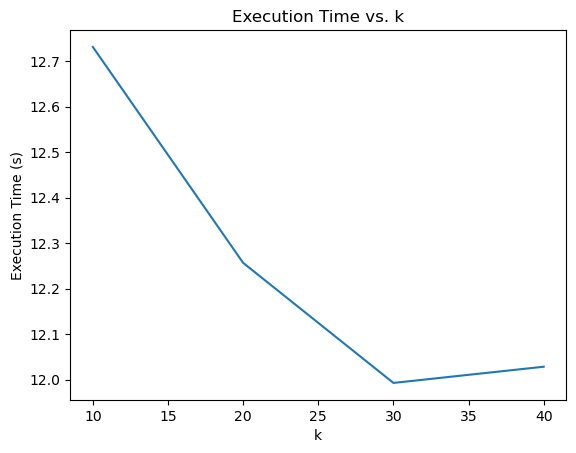

In [ ]:
# do not run 
import matplotlib.pyplot as plt
plt.plot(k_vals, exec_times)
plt.xlabel("k")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time vs. k")
plt.show()

## Using Query Expansion : still to do and experiment

In [9]:
embeddingmodel = EmbeddingModel(vocab = index.vocab, save_path="data/embeddings.pkl")
#need to compute embeddings again! before running this
#retrieved_docs_expansion = run_queries(queries_examples, index, embeddingmodel, expansion=True)

c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serializati

Loading embeddings from data/embeddings.pkl...


In [10]:
_,retrieved_docs_emb = run_queries(queries_examples, index, embeddingmodel, expansion=True, k=30)

#also prints it token not found 

  0%|          | 0/24 [00:00<?, ?it/s]

Query: TypeError: 'NoneType' object is not subscriptable in Python
Starting ranked search
Word 'typeerror:' not found in precomputed embeddings
❌ Word 'typeerror:' not found in vocabulary. Cannot find similar words.
Word ''nonetype'' not found in precomputed embeddings
❌ Word ''nonetype'' not found in vocabulary. Cannot find similar words.
[113939 152264  34870]
Word 'is' not found in precomputed embeddings
❌ Word 'is' not found in vocabulary. Cannot find similar words.
[127957   4118]
Word 'subscriptable' not found in precomputed embeddings
❌ Word 'subscriptable' not found in vocabulary. Cannot find similar words.
[116217]
[ 94587 219529 151324]


  4%|▍         | 1/24 [00:05<01:57,  5.10s/it]

Top results: ['1490039', '1308079', '631788', '1689012', '1449620', '598010', '597178', '1689145', '768941', '1115313', '1772491', '550585', '550915', '768956', '1529527', '1689139', '999182', '1728697', '550868', '1223197', '1601656', '506956', '1646326', '1264818', '1385753', '772220', '745600', '1520897', '1593100', '788935']


Query: NullPointerException handling in Java
Starting ranked search
Word 'nullpointerexception' not found in precomputed embeddings
❌ Word 'nullpointerexception' not found in vocabulary. Cannot find similar words.
Word 'handling' not found in precomputed embeddings
❌ Word 'handling' not found in vocabulary. Cannot find similar words.
[116217  80748]
[134191  97021]


  8%|▊         | 2/24 [00:08<01:26,  3.92s/it]

Top results: ['1202552', '1345786', '1264818', '1733292', '883621', '1184789', '1366832', '767009', '1028892', '817562', '1607800', '1697522', '961538', '1125604', '1580091', '1593100', '609329', '1259460', '580511', '1202530', '1514112', '1533812', '1202523', '841292', '1711103', '889924', '593397', '688002', '998049', '1208295']


Query: ModuleNotFoundError: No module named 'requests'
Starting ranked search
Word 'modulenotfounderror:' not found in precomputed embeddings
❌ Word 'modulenotfounderror:' not found in vocabulary. Cannot find similar words.
Word 'no' not found in precomputed embeddings
❌ Word 'no' not found in vocabulary. Cannot find similar words.
Word 'module' not found in precomputed embeddings
❌ Word 'module' not found in vocabulary. Cannot find similar words.
Word 'named' not found in precomputed embeddings
❌ Word 'named' not found in vocabulary. Cannot find similar words.
Word ''requests'' not found in precomputed embeddings
❌ Word ''requests'' not found in vocabulary

 12%|█▎        | 3/24 [00:09<00:57,  2.76s/it]

Top results: ['818020', '816834', '1731441', '1477365']


Query: Segmentation fault in C++
Starting ranked search
Word 'segmentation' not found in precomputed embeddings
❌ Word 'segmentation' not found in vocabulary. Cannot find similar words.
[63562]
[116217]
Word 'c++' not found in precomputed embeddings
❌ Word 'c++' not found in vocabulary. Cannot find similar words.


 17%|█▋        | 4/24 [00:11<00:50,  2.51s/it]

Top results: ['598611', '1070621', '1411119', '1007080', '1277212', '603521', '803472', '980708', '1367027', '1186922', '1467150', '1633993', '953639', '818020', '1441647', '974471', '679302', '1627929', '816834', '1731441', '1477365', '989485', '1130819', '1790201', '742549', '1251464', '1106181', '960382', '1119373', '1649067']


Query: SyntaxError: invalid syntax near 'elif'
Starting ranked search
Word 'syntaxerror:' not found in precomputed embeddings
❌ Word 'syntaxerror:' not found in vocabulary. Cannot find similar words.
[128994  58589]
[ 15769 185524  76992]
[44624 26196]
Word ''elif'' not found in precomputed embeddings
❌ Word ''elif'' not found in vocabulary. Cannot find similar words.


 21%|██        | 5/24 [00:14<00:50,  2.66s/it]

Top results: ['1609510', '1452239', '558053', '730064', '1448941', '756384', '937491', '1256311', '971177', '1111227', '829798', '829916', '491999', '1432968', '826948', '1227605', '696889', '584284', '614993', '1776176', '659061', '1396782', '1291502', '1661491', '624492', '1439123', '609675', '1281654', '1529957', '1719624']


Query: Difference between DFS and BFS algorithms
Starting ranked search
Word 'difference' not found in precomputed embeddings
❌ Word 'difference' not found in vocabulary. Cannot find similar words.
[135717]
[47515 52771 47561]
[ 6406 37723]
[28649]
Word 'algorithms' not found in precomputed embeddings
❌ Word 'algorithms' not found in vocabulary. Cannot find similar words.


 25%|██▌       | 6/24 [00:17<00:51,  2.85s/it]

Top results: ['1658569', '1432429', '1567015', '694369', '820054', '1054626', '590393', '754448', '844822', '1432093', '862624', '1432024', '1636119', '1383231', '1403484', '827647', '1657167', '1657248', '812505', '829177', '1434787', '1150723', '1083028', '1484876', '685861', '829156', '1441880', '1657174', '998520', '1372993']


Query: How does garbage collection work in Java?
Starting ranked search
[ 59294 209620]
Word 'does' not found in precomputed embeddings
❌ Word 'does' not found in vocabulary. Cannot find similar words.
Word 'garbage' not found in precomputed embeddings
❌ Word 'garbage' not found in vocabulary. Cannot find similar words.
Word 'collection' not found in precomputed embeddings
❌ Word 'collection' not found in vocabulary. Cannot find similar words.
[209056 212306 186841]
[116217]
Word 'java?' not found in precomputed embeddings
❌ Word 'java?' not found in vocabulary. Cannot find similar words.


 29%|██▉       | 7/24 [00:20<00:46,  2.73s/it]

Top results: ['1309138', '668171', '829525', '1268725', '823764', '1790201', '569315', '1661771', '670686', '1595849', '1452953', '701784', '765129', '920845', '630056', '1168200', '1099837', '1251706', '1050889', '818020', '793320', '742549', '1165758', '896840', '639245', '827121', '579255', '1307149', '1436035', '1251464']


Query: What is tail recursion, and how does it optimize memory
Starting ranked search
[190758  83441]
Word 'is' not found in precomputed embeddings
❌ Word 'is' not found in vocabulary. Cannot find similar words.
[ 32757 103142]
Word 'recursion,' not found in precomputed embeddings
❌ Word 'recursion,' not found in vocabulary. Cannot find similar words.
[  6406  37723 108296]
[59294]
Word 'does' not found in precomputed embeddings
❌ Word 'does' not found in vocabulary. Cannot find similar words.
[93702  1993]


 33%|███▎      | 8/24 [00:25<00:56,  3.50s/it]

Top results: ['812505', '829177', '829315', '829156', '1309138', '846862', '1764979', '890461', '1664661', '1272995', '829525', '1096505', '748217', '824562', '1218241', '1153609', '861519', '1186896', '1647755', '715807', '1698916', '1361512', '810931', '841713', '1595849', '765129', '630056', '1082594', '887969', '1704914']


Query: What are strong and weak references in Python?
Starting ranked search
[190758  83441 182007]
[164694 210604]
[39787]
[  6406  37723 108296]
[161976 174114 169730]


 38%|███▊      | 9/24 [00:29<00:56,  3.74s/it]

Top results: ['984543', '1596206', '812505', '829177', '740943', '927179', '1088350', '1752808', '1263783', '585004', '829156', '824002', '1410832', '1774106', '1351664', '1611961', '647113', '1547004', '1546960', '1309138', '859200', '797606', '1263655', '1658320', '632159', '1786635', '846862', '1587348', '1072548', '597664']


Query: Explain dynamic programming with an example
Starting ranked search
[45782 34711]
[194857]
Word 'programming' not found in precomputed embeddings
❌ Word 'programming' not found in vocabulary. Cannot find similar words.
[179648]


 42%|████▏     | 10/24 [00:32<00:48,  3.47s/it]

[97084]
Word 'example' not found in precomputed embeddings
❌ Word 'example' not found in vocabulary. Cannot find similar words.
Top results: ['1693835', '885903', '1724137', '1547201', '1547196', '1724304', '1621971', '1271643', '1315570', '1516174', '1547210', '1285655', '589855', '1529201', '1289174', '1091524', '1289099', '1547224', '562770', '1289135', '1736340', '1737786', '558181', '772929', '1288985', '1737763', '1288904', '1697816', '1192007', '1386283']


Query: Best way to concatenate strings in Python
Starting ranked search
[212375  22019  44618]
[ 67864 161444 211931]
[2 3]
Word 'concatenate' not found in precomputed embeddings
❌ Word 'concatenate' not found in vocabulary. Cannot find similar words.
Word 'strings' not found in precomputed embeddings
❌ Word 'strings' not found in vocabulary. Cannot find similar words.
[116217  80748  55928]


 46%|████▌     | 11/24 [00:36<00:45,  3.52s/it]

Top results: ['1101301', '1540749', '838239', '1574530', '1192881', '1574546', '994671', '1252060', '1076577', '1494087', '1327731', '1641991', '631788', '1089550', '1451407', '614724', '533768', '1115313', '931747', '1538308', '531327', '1135575', '1529527', '1728697', '1504378', '749796', '1547019', '1067806', '1646326', '1264818']


Query: How to optimize SQL queries for large datasets?
Starting ranked search
[59294]
[2 3]
Word 'optimize' not found in precomputed embeddings
❌ Word 'optimize' not found in vocabulary. Cannot find similar words.
[152137 119619]
Word 'queries' not found in precomputed embeddings
❌ Word 'queries' not found in vocabulary. Cannot find similar words.
[220722 211265  70490]
Word 'large' not found in precomputed embeddings
❌ Word 'large' not found in vocabulary. Cannot find similar words.
Word 'datasets?' not found in precomputed embeddings
❌ Word 'datasets?' not found in vocabulary. Cannot find similar words.


 50%|█████     | 12/24 [00:39<00:42,  3.53s/it]

Top results: ['838239', '829525', '1668702', '1252060', '1318667', '1607548', '1494087', '1420382', '1446421', '1436359', '1135653', '618406', '1659686', '552777', '1223398', '1166032', '935121', '1117887', '1538308', '1136273', '869164', '1617835', '1254838', '1460064', '1618198', '1729147', '841783', '678420', '471305', '1367344']


Query: When to use pointers in C++?
Starting ranked search
[209811  86286  71833]
[ 2  3 99]
[202713]
Word 'pointers' not found in precomputed embeddings
❌ Word 'pointers' not found in vocabulary. Cannot find similar words.
[116217  80748]
Word 'c++?' not found in precomputed embeddings
❌ Word 'c++?' not found in vocabulary. Cannot find similar words.


 54%|█████▍    | 13/24 [00:42<00:37,  3.42s/it]

Top results: ['838239', '1252060', '1494087', '1538308', '948068', '1166032', '607319', '1328843', '1497468', '1089563', '842833', '1674109', '1527146', '1129040', '745837', '1621957', '598121', '900766', '1090462', '1668702', '1202530', '1089550', '1338171', '1202523', '1318667', '1390502', '1506655', '1540749', '870477', '1574530']


Query: Why is binary search faster than linear search?
Starting ranked search
Word 'why' not found in precomputed embeddings
❌ Word 'why' not found in vocabulary. Cannot find similar words.
Word 'is' not found in precomputed embeddings
❌ Word 'is' not found in vocabulary. Cannot find similar words.
Word 'binary' not found in precomputed embeddings
❌ Word 'binary' not found in vocabulary. Cannot find similar words.
[182804]
[63505 54571]
[189884 189885 189850]
[169730  31196 204715]
Word 'search?' not found in precomputed embeddings
❌ Word 'search?' not found in vocabulary. Cannot find similar words.
Top results: ['545003', '721797', '1275665', '1285910',

 58%|█████▊    | 14/24 [00:45<00:32,  3.30s/it]

Query: How to improve performance of nested loops in Java?
Starting ranked search
[ 59294 209620]
[ 2  3 99]
Word 'improve' not found in precomputed embeddings
❌ Word 'improve' not found in vocabulary. Cannot find similar words.
Word 'performance' not found in precomputed embeddings
❌ Word 'performance' not found in vocabulary. Cannot find similar words.
[98390 24783]


 62%|██████▎   | 15/24 [00:48<00:28,  3.16s/it]

[67706 49836 62789]
Top results: ['838239', '1252060', '1494087', '1538308', '1648250', '1176423', '1350261', '1479089', '730848', '607319', '1387726', '1328843', '745765', '778397', '1497468', '1309138', '1133205', '642228', '1404310', '1378428', '708595', '1089563', '1621957', '829525', '1310776', '1090462', '1626013', '1668702', '1148880', '1310983']


Query: How to use Pandas groupby with multiple columns?
Starting ranked search
[ 59294 209620]
[2]
[202713 202634 188656]
Word 'pandas' not found in precomputed embeddings
❌ Word 'pandas' not found in vocabulary. Cannot find similar words.
Word 'groupby' not found in precomputed embeddings
❌ Word 'groupby' not found in vocabulary. Cannot find similar words.
[179648 108470 201077]
Word 'multiple' not found in precomputed embeddings
❌ Word 'multiple' not found in vocabulary. Cannot find similar words.
Word 'columns?' not found in precomputed embeddings
❌ Word 'columns?' not found in vocabulary. Cannot find similar words.


 67%|██████▋   | 16/24 [00:54<00:30,  3.78s/it]

Top results: ['1044415', '1761015', '1354211', '1720083', '772929', '1437177', '1744062', '1512288', '1309138', '1019653', '1395798', '892296', '1315570', '1163411', '507014', '1113038', '1163442', '829525', '1494087', '558181', '1520010', '1626013', '1191031', '1619657', '1144050', '1318667', '1618674', '734616', '931747', '1234550']


Query: What does std::move do in C++?
Starting ranked search
[190758  83441]
Word 'does' not found in precomputed embeddings
❌ Word 'does' not found in vocabulary. Cannot find similar words.
Word 'std::move' not found in precomputed embeddings
❌ Word 'std::move' not found in vocabulary. Cannot find similar words.
[110950  51345]
[116217  80748  55928]
Word 'c++?' not found in precomputed embeddings
❌ Word 'c++?' not found in vocabulary. Cannot find similar words.


 71%|███████   | 17/24 [00:56<00:24,  3.49s/it]

Top results: ['1309138', '1101301', '930813', '829525', '1202530', '1202523', '1519597', '1426701', '1099864', '772037', '1649067', '1170221', '1595849', '765129', '630056', '1168200', '1099837', '1202564', '1050889', '1194533', '619961', '1769480', '818020', '1654788', '668171', '1124670', '1790201', '579255', '1202509', '742549']


Query: Difference between apply() and map() in Pandas
Starting ranked search
Word 'difference' not found in precomputed embeddings
❌ Word 'difference' not found in vocabulary. Cannot find similar words.
[135717]
Word 'apply()' not found in precomputed embeddings
❌ Word 'apply()' not found in vocabulary. Cannot find similar words.
[  6406  37723 108296]
Word 'map()' not found in precomputed embeddings
❌ Word 'map()' not found in vocabulary. Cannot find similar words.


 75%|███████▌  | 18/24 [00:59<00:18,  3.13s/it]

[116217  80748  55928]
Word 'pandas' not found in precomputed embeddings
❌ Word 'pandas' not found in vocabulary. Cannot find similar words.
Top results: ['812505', '829177', '829156', '1567015', '1101301', '846862', '829315', '901098', '968438', '1202530', '703931', '1202523', '1218241', '1099864', '1698916', '772037', '1361512', '810931', '1202564', '1199490', '1790201', '742549', '957376', '1148238', '1251464', '960382', '1119373', '1649067', '993666', '1406660']


Query: How to use React hooks for state management?
Starting ranked search
[ 59294 209620]
[2 3]
[202713 202634 188656]
[154606]
Word 'hooks' not found in precomputed embeddings
❌ Word 'hooks' not found in vocabulary. Cannot find similar words.
[220722 211265]


 79%|███████▉  | 19/24 [01:03<00:17,  3.41s/it]

Top results: ['838239', '1494087', '1252060', '1497468', '1655916', '1655979', '1538308', '607319', '1166032', '1328843', '1437177', '1309138', '1167942', '1089563', '470780', '507014', '1621957', '1113038', '829525', '826826', '1090462', '1520010', '1626013', '1668702', '1089550', '1633355', '1711226', '955458', '1318667', '1618674']


Query: How to make an API request with Axios in JavaScript?
Starting ranked search
[ 59294 209620]
[2 3]
[38603]
[97084   687]
[ 3090 52766]
[31040]


 83%|████████▎ | 20/24 [01:08<00:15,  3.93s/it]

Top results: ['838239', '1252060', '1494087', '1488340', '1234550', '1538308', '1693835', '1540749', '996130', '1626013', '607319', '1328843', '1091619', '1039424', '1497468', '1547201', '1309138', '1547196', '869164', '1724304', '1724137', '1621971', '1516174', '1547210', '1089563', '1285655', '1529201', '1391102', '1289174', '1289099']


Query: I want pasta for dinner
Starting ranked search
[ 22003  80499 188635]
[100147  54288  57960]
[  4436 144915 134944]
[220722]


 88%|████████▊ | 21/24 [01:11<00:11,  3.79s/it]

Top results: ['1247634', '1247818', '739461', '598370', '691795', '950412', '849900', '679049', '1017046', '589358', '1206005', '1301357', '1035895', '908521', '1662827', '1771806', '1476290', '1084009', '858735', '859119', '1104106', '761029', '939890', '1103573', '1742904', '936584', '849928', '889507', '1275781', '1105382']


Query: coding is very hard
Starting ranked search
Word 'coding' not found in precomputed embeddings
❌ Word 'coding' not found in vocabulary. Cannot find similar words.
Word 'is' not found in precomputed embeddings
❌ Word 'is' not found in vocabulary. Cannot find similar words.
Word 'very' not found in precomputed embeddings
❌ Word 'very' not found in vocabulary. Cannot find similar words.


 92%|█████████▏| 22/24 [01:12<00:05,  2.91s/it]

[31966]
Top results: ['530494', '967819', '791750', '1059895', '881871', '789811', '767778', '935224', '876985', '828294', '817297', '1499116', '1672478', '739283', '1531795', '695347', '844088', '1688740', '588990', '828207', '1137178', '648708', '583890', '1353881', '1616959', '552026', '758510', '1164685', '660437', '828217']


Query: ajdejfn code
Starting ranked search
Word 'ajdejfn' not found in precomputed embeddings
❌ Word 'ajdejfn' not found in vocabulary. Cannot find similar words.
[33112]


 96%|█████████▌| 23/24 [01:13<00:02,  2.34s/it]

Top results: ['1246102', '796224', '1358525', '682310', '508002', '924898', '1358531', '1522476', '912207', '1523515', '1523147', '706964', '1358530', '589554', '1563068', '1355015', '1405985', '1210539', '1358527', '1637385', '1013063', '1075626', '588949', '670204', '1264618', '1736424', '924334', '1674535', '1320736', '946558']


Query: how to make a website
Starting ranked search
[ 59294 209620 134642]
[ 2  3 99]
[38603 85770 70486]
[121157  62659]


100%|██████████| 24/24 [01:17<00:00,  3.22s/it]

Top results: ['838239', '1252060', '1376055', '1494087', '607319', '747929', '1538308', '659184', '1376140', '531327', '548548', '599366', '1328843', '557428', '498152', '1497468', '1309138', '869164', '646748', '611109', '1089563', '487289', '580983', '590073', '568490', '1621957', '829525', '616617', '547080', '1090462']


Total Execution Time: 77.3966 seconds
Average Time per Query: 3.2249 seconds


In [15]:
# analyze if the results are different
# Compare the results of the two methods

def jaccard_similarity(list1, list2):
    set1, set2 = set(list1), set(list2)
    intersection = len(set1 & set2)
    union = len(set1 | set2)
    return intersection / union if union > 0 else 0

for query in queries_examples:
    print(f"Query: {query}", jaccard_similarity(retrieved_docs[query], retrieved_docs_emb[query]))
    #compute jaccard similarity
    #print("Results without expansion:", retrieved_docs[query])
    #print("Results with expansion:", retrieved_docs_emb[query])



Query: TypeError: 'NoneType' object is not subscriptable in Python 0.3333333333333333
Query: NullPointerException handling in Java 0.3333333333333333
Query: ModuleNotFoundError: No module named 'requests' 1.0
Query: Segmentation fault in C++ 0.3333333333333333
Query: SyntaxError: invalid syntax near 'elif' 0.3333333333333333
Query: Difference between DFS and BFS algorithms 0.3333333333333333
Query: How does garbage collection work in Java? 0.3333333333333333
Query: What is tail recursion, and how does it optimize memory 0.3333333333333333
Query: What are strong and weak references in Python? 0.3333333333333333
Query: Explain dynamic programming with an example 0.3333333333333333
Query: Best way to concatenate strings in Python 0.3333333333333333
Query: How to optimize SQL queries for large datasets? 0.02564102564102564
Query: When to use pointers in C++? 0.0
Query: Why is binary search faster than linear search? 0.3333333333333333
Query: How to improve performance of nested loops in Ja

## Other searches

sean will do this - based on the retrieval_functions.py

## Evaluation
First using the clarity score and then with Jaccobian/cosine similarity of the documents <br>
**Clarity scores are all positive** :  A higher Clarity Score means the query retrieves more distinct and focused documents, while a lower score suggests the retrieved documents are more generic or similar to the background corpus <br>
**Jaccobian/cosine similarity** : Measures the similarity between the retrieved documents

In [ ]:
import math
from collections import Counter

def load_document_terms(file_path, retrieved_docs):
    """
    Reads document terms from `document_terms.txt` and extracts terms for retrieved documents.
    Returns : Counter: A term frequency counter for retrieved documents.
    """
    retrieved_vocab = Counter()

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split(":")
            if len(parts) < 2:
                continue  # Skip malformed lines
            
            doc_id = parts[0].strip()
            if doc_id in retrieved_docs:  # Process only retrieved documents
                terms = parts[1].split()
                retrieved_vocab.update(terms)  # Count term frequencies

    return retrieved_vocab


def compute_clarity_score(document_terms_file, retrieved_docs, index):
    """
    Computes the Clarity Score using KL divergence efficiently with `document_terms.txt`.

    Args:
        document_terms_file (str): Path to the `document_terms.txt` file.
        retrieved_docs (list): List of retrieved document IDs.
        index (dict): The inverted index with term document frequency (df).

    Returns:
        float: Clarity Score (higher means query is more specific).
    """

    # extract terms for retrieved documents -> this is way more efficient that going through index file
    retrieved_vocab = load_document_terms(document_terms_file, set(retrieved_docs))

    # compute probability distribution for retrieved terms
    total_retrieved_terms = sum(retrieved_vocab.values())
    if total_retrieved_terms == 0:
        return 0  

    retrieved_probs = {term: count / total_retrieved_terms for term, count in retrieved_vocab.items()}

    # Compute Clarity Score using document frequency (df) from index
    total_docs = sum(term_data["df"] for term_data in index.values())  # Total number of docs in index
    clarity_score = 0.0

    for term, p_retrieved in retrieved_probs.items():
        p_corpus = index.get(term, {}).get("df", 1e-12) / total_docs  # Use DF as corpus probability
        clarity_score += p_retrieved * math.log(p_retrieved / p_corpus)

    return clarity_score

# Compute Clarity Scores : they all seem positive and good 

documents_list = retrieved_docs

for query in queries_examples:
    clarity_score = compute_clarity_score("data/document_terms.txt", documents_list[query], index.get_index())
    print(f"Clarity Score for '{query}': {clarity_score:.4f}")


#higher clarity scores - makes sense as the expansion should make the query more specific

#need to visualize the tradeoff with the number of added words!
documents_list = retrieved_docs_emb

print("Results with expansion:")
for query in queries_examples:
    clarity_score = compute_clarity_score("data/document_terms.txt", documents_list[query], index.get_index())
    print(f"Clarity Score for '{query}': {clarity_score:.4f}")


Clarity Score for 'TypeError: 'NoneType' object is not subscriptable in Python': 2.2356
Clarity Score for 'NullPointerException handling in Java': 2.5564
Clarity Score for 'ModuleNotFoundError: No module named 'requests'': 2.6116
Clarity Score for 'Segmentation fault in C++': 2.4958
Clarity Score for 'SyntaxError: invalid syntax near 'elif'': 2.5540
Clarity Score for 'Difference between DFS and BFS algorithms': 3.0122
Clarity Score for 'How does garbage collection work in Java?': 2.6428
Clarity Score for 'What is tail recursion, and how does it optimize memory': 3.0685
Clarity Score for 'What are strong and weak references in Python?': 2.3415
Clarity Score for 'Explain dynamic programming with an example': 2.8331
Clarity Score for 'Best way to concatenate strings in Python': 2.5238
Clarity Score for 'How to optimize SQL queries for large datasets?': 2.6725
Clarity Score for 'When to use pointers in C++?': 2.4395
Clarity Score for 'Why is binary search faster than linear search?': 2.819

In [ ]:
import itertools
import numpy as np
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity

def load_document_terms(file_path, retrieved_docs):
    """
    Reads `document_terms.txt` and extracts terms for retrieved documents.

    Args:
        file_path (str): Path to the document terms file.
        retrieved_docs (set): A set of retrieved document IDs.

    Returns:
        dict: A dictionary where keys are doc IDs and values are term lists.
    """
    doc_terms = {}
    doc_lengths = {}  # Store document lengths for normalization

    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split(":")
            if len(parts) < 2:
                continue  # Skip malformed lines
            
            doc_id = parts[0].strip()
            if doc_id in retrieved_docs:  # Process only retrieved documents
                terms = parts[1].split()
                doc_terms[doc_id] = terms
                doc_lengths[doc_id] = len(terms)  # Store document length

    return doc_terms, doc_lengths


def jaccard_similarity(doc1_terms, doc2_terms):
    """
    Computes Jaccard Similarity with length normalization.
    J(A, B) = |A ∩ B| / |A ∪ B|
    """
    intersection = len(set(doc1_terms) & set(doc2_terms))
    union = len(set(doc1_terms) | set(doc2_terms))
    return intersection / union if union != 0 else 0.0


def compute_document_similarities(document_terms_file, retrieved_docs):
    """
    Computes pairwise Jaccard & Cosine Similarity between retrieved documents with length normalization.

    Args:
        document_terms_file (str): Path to `document_terms.txt`.
        retrieved_docs (list): List of retrieved document IDs.

    Returns:
        dict: Average Jaccard & Cosine similarity.
    """

    # load documents and lengths -> we want to normalize!
    doc_terms, doc_lengths = load_document_terms(document_terms_file, set(retrieved_docs))
    doc_ids = list(doc_terms.keys())

    # compute Jaccard Similarity and take the mean
    jaccard_scores = []
    for doc1, doc2 in itertools.combinations(doc_ids, 2):
        jaccard_scores.append(jaccard_similarity(doc_terms[doc1], doc_terms[doc2]))

    avg_jaccard = np.mean(jaccard_scores) if jaccard_scores else 0.0

    #  compute Cosine Similarity 
    all_terms = sorted(set(term for terms in doc_terms.values() for term in terms))  # Unique terms
    term_index = {term: i for i, term in enumerate(all_terms)}

    doc_vectors = []
    avg_doc_length = np.mean(list(doc_lengths.values())) if doc_lengths else 1

    for doc_id in doc_ids:
        term_freq = Counter(doc_terms[doc_id])  # Count term occurrences
        vector = np.zeros(len(all_terms))
        for term, freq in term_freq.items():
            # Apply BM25-style document length normalization
            normalized_tf = freq / (freq + 1.5 * (1 - 0.75 + 0.75 * (doc_lengths[doc_id] / avg_doc_length)))
            vector[term_index[term]] = normalized_tf
        doc_vectors.append(vector)

    doc_vectors = np.array(doc_vectors)
    cosine_sim_matrix = cosine_similarity(doc_vectors)

    # Compute average pairwise cosine similarity
    cosine_scores = []
    for i in range(len(doc_ids)):
        for j in range(i + 1, len(doc_ids)):
            cosine_scores.append(cosine_sim_matrix[i, j])

    avg_cosine = np.mean(cosine_scores) if cosine_scores else 0.0

    return {
        "Average Jaccard Similarity": avg_jaccard,
        "Average Cosine Similarity": avg_cosine
    }

for query in queries_examples:
    if retrieved_docs[query]:
        similarities = compute_document_similarities("data/document_terms.txt", retrieved_docs[query])
        print(f"Similarities for '{query}': {similarities}")
    else:
        print(f"No retrieved documents for '{query}'")

Similarities for 'TypeError: 'NoneType' object is not subscriptable in Python': {'Average Jaccard Similarity': 0.05632541946569733, 'Average Cosine Similarity': 0.11966260768140392}
Similarities for 'NullPointerException handling in Java': {'Average Jaccard Similarity': 0.09270600714378863, 'Average Cosine Similarity': 0.18105303962727817}
No retrieved documents for 'ModuleNotFoundError: No module named 'requests''
Similarities for 'Segmentation fault in C++': {'Average Jaccard Similarity': 0.03873586873869889, 'Average Cosine Similarity': 0.08172648816543192}
Similarities for 'SyntaxError: invalid syntax near 'elif'': {'Average Jaccard Similarity': 0.07332165149680576, 'Average Cosine Similarity': 0.1482536039022934}
Similarities for 'Difference between DFS and BFS algorithms': {'Average Jaccard Similarity': 0.0907343787417974, 'Average Cosine Similarity': 0.1708309952282187}
Similarities for 'How does garbage collection work in Java?': {'Average Jaccard Similarity': 0.036173275299940

## Reranked based on metadata

In [24]:
#the reranker ranks mostly every time differently than the initial retrieval

reranked = Reranker()
#print(reranked.metadata)
reranked.metadata["id"] = reranked.metadata["id"].astype(str).str.strip()
reranked_doc_list={}
for key,retrieved_docs_list in retrieved_docs.items():
    print("initial list")
    print(retrieved_docs_list)
    if retrieved_docs_list!="No relevant documents found for this query.":
        print("after reranking")
        reranked_doc_list[key]=reranked.rerank_metadata(retrieved_docs_list)
        print(reranked_doc_list[key])
    else:
        print("no reranking")


c:\Users\annie\anaconda3\anaconda\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file, map_

initial list
['1490039', '1308079', '631788', '1689012', '1449620', '1689145', '768941', '1115313', '1772491', '550585']
after reranking
['1115313', '631788', '1490039', '550585', '768941', '1689145', '1308079', '1449620', '1689012', '1772491']
initial list
['1345786', '1264818', '1733292', '1184789', '1366832', '767009', '1028892', '1607800', '1697522', '961538']
after reranking
['767009', '961538', '1264818', '1345786', '1607800', '1733292', '1028892', '1184789', '1697522', '1366832']
initial list
['818020', '816834', '1731441', '1477365']
after reranking
['816834', '818020', '1477365', '1731441']
initial list
['818020', '816834', '1731441', '1477365', '1790201', '742549', '1251464', '960382', '1119373', '1649067']
after reranking
['960382', '816834', '742549', '818020', '1649067', '1119373', '1251464', '1790201', '1477365', '1731441']
initial list
['1452239', '730064', '756384', '937491', '1256311', '971177', '1111227', '829798', '829916', '491999']
after reranking
['937491', '97117

## Reranked based on LM

In [26]:
file_path_1 = os.path.join(parent_dir, "retrieval_models", "data", "half_1.pkl")
with open(file_path_1, "rb") as f:
    data_1 = pickle.load(f)  # Load first dictionary

file_path_2 = os.path.join(parent_dir, "retrieval_models", "data", "half_2.pkl")
with open(file_path_2, "rb") as f:
    data_2 = pickle.load(f)  # Load second dictionary

# Ensure both are dictionaries before merging
if isinstance(data_1, dict) and isinstance(data_2, dict):
    lm_documents = {**data_1, **data_2}  # Merge both dictionaries (overwrites duplicates)
else:
    lm_documents = {}  # Empty dictionary if loading failed

# Print number of documents
print(f"Total documents loaded: {len(lm_documents)}")

Total documents loaded: 1000000


In [27]:
for query in queries_examples:
    if retrieved_docs[query]:
        print("before reranking")
        print(retrieved_docs[query])
        print("after reranking")
        print(reranked.rerank_lm(retrieved_docs[query], query, lm_documents))
        

before reranking
['1490039', '1308079', '631788', '1689012', '1449620', '1689145', '768941', '1115313', '1772491', '550585']
after reranking
['1308079', '631788', '1490039', '1689012', '1449620', '550585', '768941', '1689145', '1115313', '1772491']
before reranking
['1345786', '1264818', '1733292', '1184789', '1366832', '767009', '1028892', '1607800', '1697522', '961538']
after reranking
['1264818', '1366832', '1607800', '1733292', '767009', '961538', '1697522', '1184789', '1345786', '1028892']
before reranking
['818020', '816834', '1731441', '1477365']
after reranking
['816834', '1477365', '1731441', '818020']
before reranking
['818020', '816834', '1731441', '1477365', '1790201', '742549', '1251464', '960382', '1119373', '1649067']
after reranking
['1119373', '1731441', '816834', '742549', '1477365', '1251464', '1649067', '1790201', '818020', '960382']
before reranking
['1452239', '730064', '756384', '937491', '1256311', '971177', '1111227', '829798', '829916', '491999']
after reranki

In [ ]:
from scipy.stats import kendalltau, spearmanr

def calculate_rank_correlation(retrieved_docs, reranked_doc_list):
    """
    Calculates Kendall's Tau and Spearman's Rank Correlation
    between the retrieved and re-ranked document lists.
    """
    correlation_results = {}

    for query in reranked_doc_list:
        retrieved_list = retrieved_docs[query]
        reranked_list = reranked_doc_list[query]

        # ensure for empty
        if not retrieved_list or not reranked_list:
            print(f"Skipping query '{query}': One of the lists is empty")
            continue

        # Compute Kendall's Tau and Spearman's Rank Correlation
        kendall_tau_ = kendalltau(retrieved_list, reranked_list).correlation
        spearman_corr_ = spearmanr(retrieved_list, reranked_list).correlation

        correlation_results[query] = {
            "Kendall's Tau": kendall_tau_,
            "Spearman's Rank Correlation": spearman_corr_
        }

        print(f"Query: {query}")
        print(f"Kendall's Tau: {kendall_tau_}")
        print(f"Spearman’s Rank Correlation: {spearman_corr_}\n")

    return correlation_results

correlation_results = calculate_rank_correlation(retrieved_docs, reranked_doc_list)

#If τ is low but re-ranking makes sense based on metadata/LM, it may be good.
#If τ is high, re-ranking didn’t change much.

#small value for all of them


Query: TypeError: 'NoneType' object is not subscriptable in Python
Kendall's Tau: 0.010526315789473684
Spearman’s Rank Correlation: 0.019548872180451125

Query: NullPointerException handling in Java
Kendall's Tau: 0.15789473684210525
Spearman’s Rank Correlation: 0.20300751879699244

Skipping query 'ModuleNotFoundError: No module named 'requests'': One of the lists is empty
Query: Segmentation fault in C++
Kendall's Tau: 0.031578947368421054
Spearman’s Rank Correlation: 0.009022556390977442

Query: SyntaxError: invalid syntax near 'elif'
Kendall's Tau: 0.021052631578947368
Spearman’s Rank Correlation: 0.12932330827067667

Query: Difference between DFS and BFS algorithms
Kendall's Tau: 0.052631578947368425
Spearman’s Rank Correlation: 0.013533834586466165

Query: How does garbage collection work in Java?
Kendall's Tau: 0.0736842105263158
Spearman’s Rank Correlation: 0.0706766917293233

Query: What is tail recursion, and how does it optimize memory
Kendall's Tau: 0.5052631578947369
Spearm